In [1]:
from __future__ import division

import matplotlib as matplotlib
import sys
!{sys.executable} -m pip install opencv-python
from pylab import *
import skimage as ski
import cv2
from skimage import data, io, filters, exposure, measure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from skimage.data import camera
from skimage.filters import frangi
from sklearn.metrics import accuracy_score
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures
from PIL import Image
from scipy import ndimage as ndi
from scipy.stats import gmean

In [2]:
def image_processing(image, mask = False, show_steps=False):
    img = cv2.imread('images/'+ image + '.jpg')
    img_green = img[:, :, 1]

    img_frangi = frangi(img_green)
    for i in range(len(img_frangi)):
        for j in range(len(img_frangi[i])):
            if img_frangi[i][j] > 0.0000002:
                img_frangi[i][j] = 255
            else:
                img_frangi[i][j] = 0

    img_mask = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    (thresh, blackAndWhiteImage) = cv2.threshold(img_mask, 1, 255, cv2.THRESH_BINARY)

    kernel = np.ones((5, 5), np.uint8)
    blackAndWhiteImage = cv2.erode(blackAndWhiteImage, kernel)

    final = img_frangi * blackAndWhiteImage
    
    kernel = np.ones((3, 3), np.uint8)
    arr = final > 0
    close = mp.remove_small_objects(arr, 10000)
    if show_steps:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        plt.imshow(cv2.cvtColor(img_green, cv2.COLOR_BGR2RGB))
        plt.show()
        plt.imshow(img_frangi, cmap=cm.Greys_r)
        plt.show()
        plt.imshow(final, cmap=cm.Greys_r)
        plt.show()
        plt.imshow(close, cmap=cm.Greys_r)
        #plt.savefig('obraz4.png',dpi=700)
        plt.show()
        

    
    if True:
        mask = cv2.cvtColor(cv2.imread('images/' + image + '_m.tif'), cv2.COLOR_BGR2RGB)[:, :, 1]
        mask = mask > 0
        a = 0
        t_i = 0
        n_i = 0
        t_m = 0
        n_m = 0
        for i, j in zip(close, mask):
            for k, l in zip(i, j):
                if l:
                    t_m += 1
                    if k:
                        t_i += 1
                else:
                    n_m += 1
                    if not k:
                        n_i += 1

                if k == l:
                    a += 1
        
        sensitiviti=t_i / t_m
        specificity=n_i / n_m
        accuracy=(t_i+n_i)/(close.shape[0] * close.shape[1])
        bal_acc=gmean([sensitiviti,specificity])
        print(f"accuracy: {a/(close.shape[0] * close.shape[1])}")
        print(f"acuracy2: {(t_i+n_i)/(close.shape[0] * close.shape[1])}")
        print(f"ballanced acuracy: {bal_acc}")
        print(f"sensitivity: {t_i / t_m}")
        print(f"specificity : {n_i / n_m}")
        
    return close

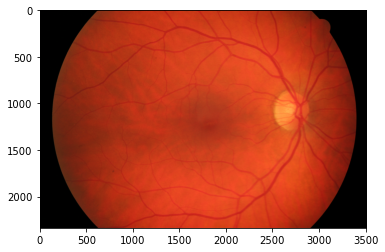

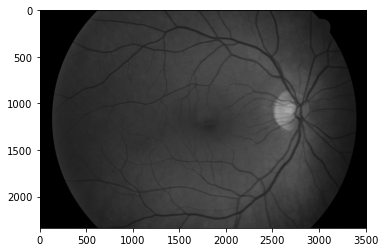

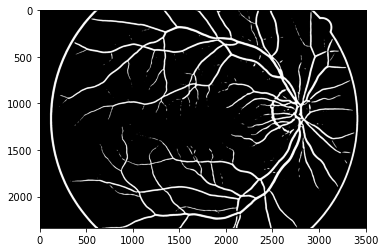

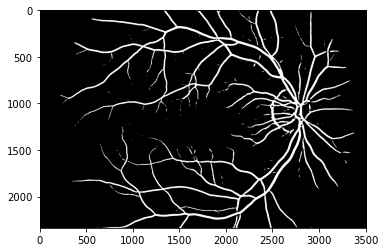

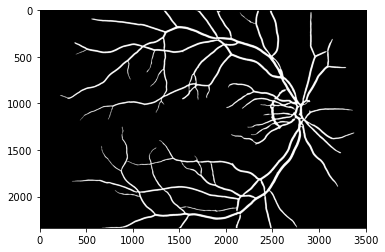

accuracy: 0.9612076169309439
acuracy2: 0.9612076169309439
ballanced acuracy: 0.8056010193814697
sensitivity: 0.6544642156185959
specificity : 0.9916401644894192


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:

image_processing('4_h', True, True)
#options=['0_h', '1_h', '2_h', '3_h', '4_h'],

In [4]:
#plt.imshow(global_image, cmap=cm.Greys_r)
#plt.savefig('foo2.png',dpi=700)

In [99]:
plt.imshow(global_image, cmap=cm.Greys_r)
saveit=global_image.tolist()
print(type(saveit))
print(type(saveit.len())
plt.imsave("obraz",saveit)
plt.show()

SyntaxError: invalid syntax (<ipython-input-99-7ae520cee735>, line 5)

In [74]:
global_image

[]

In [24]:
menu = widgets.Dropdown(
       options=['0_h', '1_h', '2_h', '3_h', '4_h'],
       value='0_h',
       description='Zdjęcie')

out = widgets.Output()
button = widgets.Button(description='Start')

def on_button_clicked(_):
    with out:
        clear_output()
        image_processing(menu.value, True, True)

button.on_click(on_button_clicked)

box = widgets.VBox([menu, button])
widgets.VBox([box,out])